#  **Fraud Detection in Credit Card Transactions using Logistic Regression, Support Vector Machine(SVM), Random Forest, Artificial Neural Networks(ANN)**

# Capstone Project 2

Name : CHEVALA AKSHAY RAJ

Batch : DST 20923

Start Date : SEPTEMBER 15 2023

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import files

uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [6]:
!pip install pandas scikit-learn statsmodels matplotlib

In [7]:

from sklearn.metrics import mean_squared_error, roc_curve, auc


In [8]:
data = pd.read_csv('creditcard.csv')

# **Data Exploration**

In [25]:
# Data Exploration
print("Dimensions:", data.shape)
print("Number of rows:", len(data))
print("Number of columns:", len(data.columns))
print(data.head(6))
print(data['Class'].value_counts())
print(data['Amount'].describe())
print(data.info())
print(data.columns)

Dimensions: (284807, 31)
Number of rows: 284807
Number of columns: 31
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.00

# **Data Pre Processing**

In [27]:
# Data Processing
print(data.isna().head())
print(data.isna().sum().tail())
data = data.dropna(axis=0)  # Drop rows with missing values
data = data.dropna(axis=1)  # Drop columns with missing values
duplicates = data.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")


    Time     V1     V2     V3     V4     V5     V6     V7     V8     V9  ...  \
0  False  False  False  False  False  False  False  False  False  False  ...   
1  False  False  False  False  False  False  False  False  False  False  ...   
2  False  False  False  False  False  False  False  False  False  False  ...   
3  False  False  False  False  False  False  False  False  False  False  ...   
4  False  False  False  False  False  False  False  False  False  False  ...   

     V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0  False  False  False  False  False  False  False  False   False  False  
1  False  False  False  False  False  False  False  False   False  False  
2  False  False  False  False  False  False  False  False   False  False  
3  False  False  False  False  False  False  False  False   False  False  
4  False  False  False  False  False  False  False  False   False  False  

[5 rows x 31 columns]
V26       0
V27       0
V28       0
Amount    

# **Scaling**

In [31]:
# Scaling the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

new_data = data.drop(columns=['Time'])
print(new_data.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

# **Spliting the data into train and test**

In [56]:

# Split the data into features (X) and target variable (y)
X = new_data.drop(columns=['Class'])
y = new_data['Class']


In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

# **Logistic Regression**

In [58]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)


In [85]:
# Accuracy and Classification Report
accuracy = accuracy_score(y_test, logistic_predictions)*100
print(accuracy)

99.89642217618764


In [63]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, logistic_predictions)
print("Confusion Matrix:\n", conf_matrix)
print("Logistic Regression - Classification Report:\n", classification_report(y_test, logistic_predictions))

Confusion Matrix:
 [[56833    14]
 [   45    70]]
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.83      0.61      0.70       115

    accuracy                           1.00     56962
   macro avg       0.92      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# **Precision-Recall Curve for Logistic Regression**

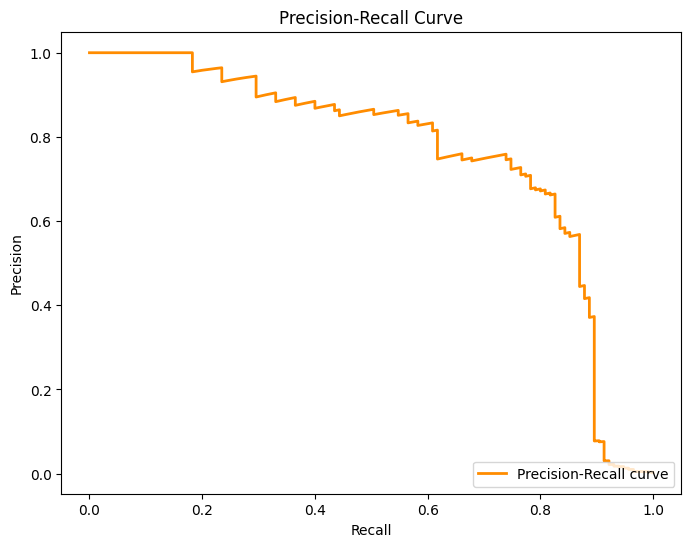

In [65]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# **ROC Curve**

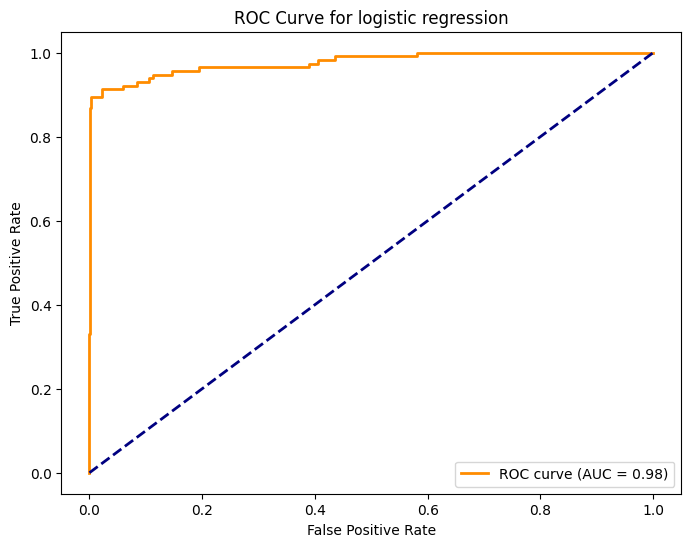

In [67]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for logistic regression')
plt.legend(loc='lower right')
plt.show()

# **Support Vector Machines (SVM)**

In [68]:
# Support Vector Machines (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)


SVM - Accuracy: 0.9993328885923949
SVM - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.94      0.71      0.81       115

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [86]:
acc_svm = accuracy_score(y_test, svm_predictions)*100
print(acc_svm)
print("SVM - Classification Report:\n", classification_report(y_test, svm_predictions))

99.93328885923948
SVM - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.94      0.71      0.81       115

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [69]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[56842     5]
 [   33    82]]


# **Support Vectors and Hyperplane plot**

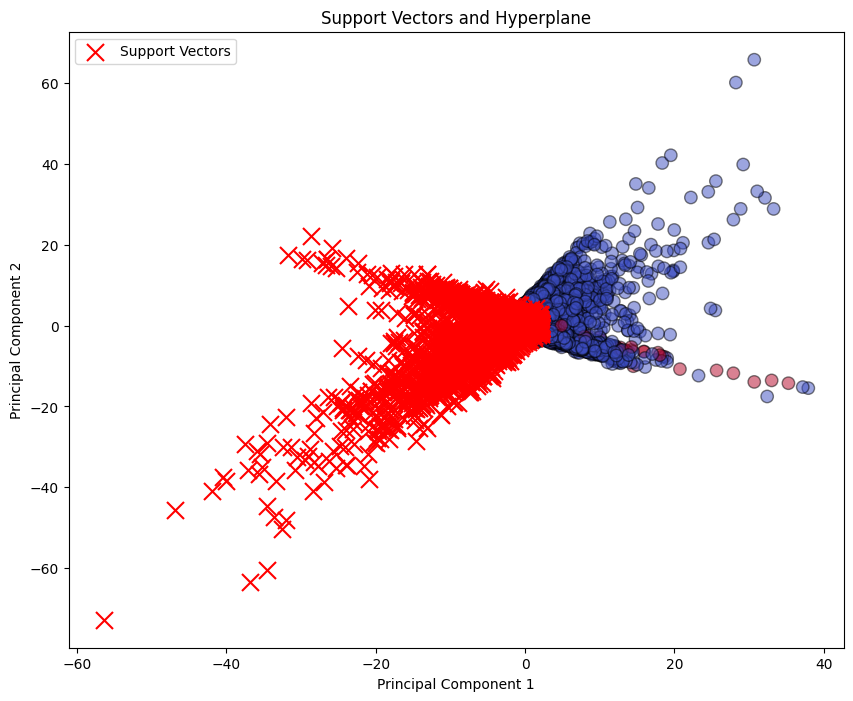

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=svm_predictions, cmap='coolwarm', edgecolors='k', marker='o', s=80, alpha=0.5)
sv = svm_model.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], c='r', marker='x', s=150, label='Support Vectors')
plt.title('Support Vectors and Hyperplane')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#**Random Forest**

In [73]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


Random Forest - Accuracy: 0.9994908886626171
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.94      0.80      0.86       115

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [84]:
acc_rf = accuracy_score(y_test, rf_predictions)*100
print(acc_rf)
print("Random Forest - Classification Report:\n", classification_report(y_test, rf_predictions))

99.94908886626172
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.94      0.80      0.86       115

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [74]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[56841     6]
 [   23    92]]


# **ROC Curve**

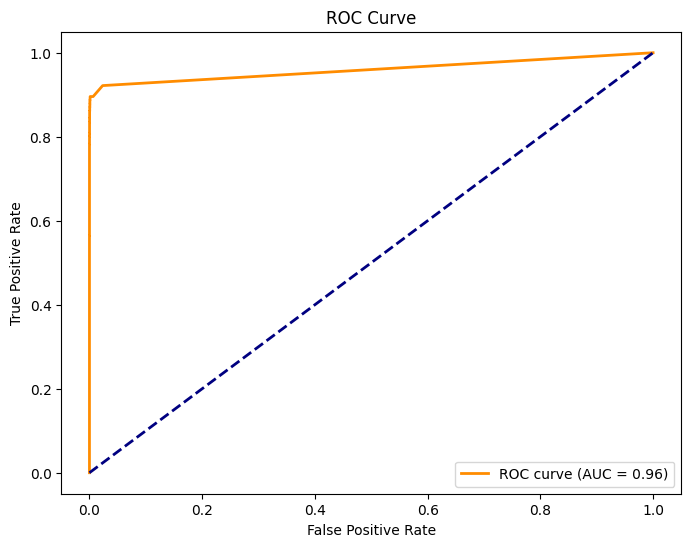

In [75]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# **Precision-Recall Curve**

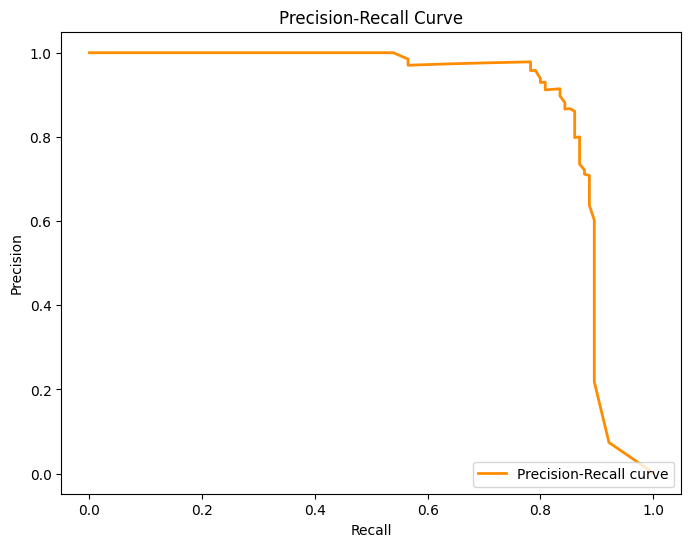

In [76]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()


# **Random Forest - Feature Importance**

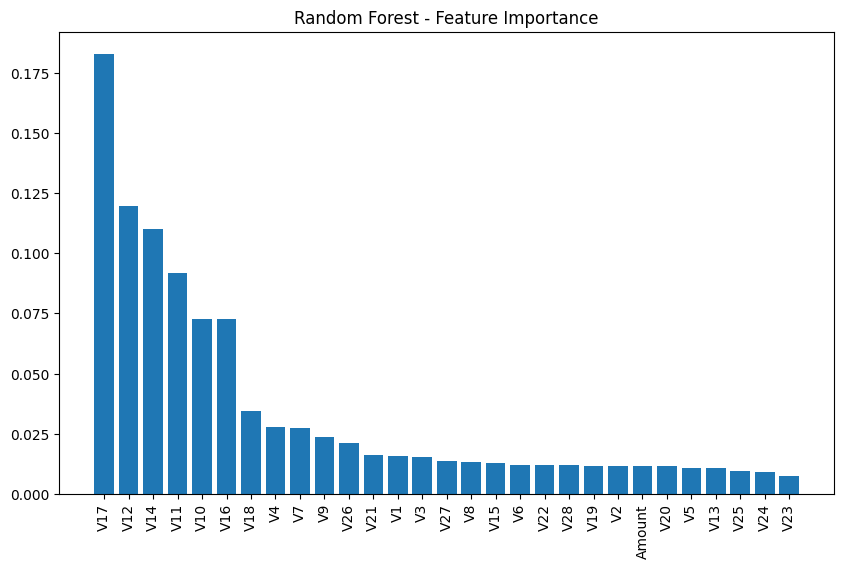

In [77]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
features = X.columns
sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), features[sorted_indices], rotation=90)
plt.title("Random Forest - Feature Importance")
plt.show()

# **Artificial Neural Network (ANN)**

In [83]:
# Artificial Neural Network (ANN)
ann_model = MLPClassifier()
ann_model.fit(X_train, y_train)
ann_predictions = ann_model.predict(X_test)


99.9385555282469
ANN - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56847
           1       0.90      0.78      0.84       115

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
ann_acc = accuracy_score(y_test, ann_predictions)*100
print(ann_acc)
print("ANN - Classification Report:\n", classification_report(y_test, ann_predictions))

In [81]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, ann_predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[56840     7]
 [   29    86]]


# **ROC Curve**

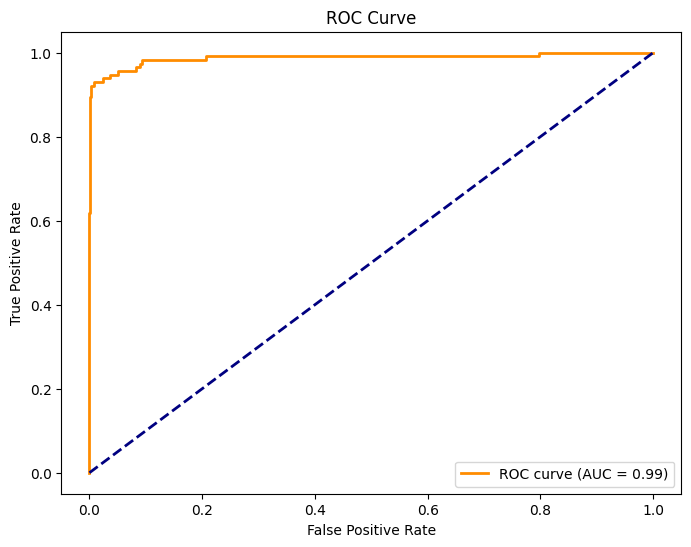

In [82]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Neural Network Architecture**

In [79]:
# Visualize the Neural Network Architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

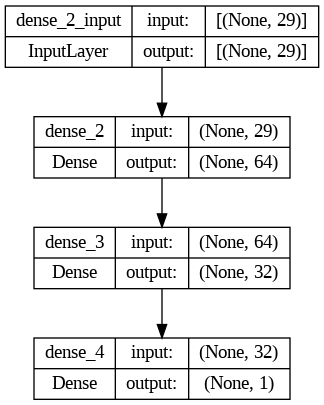

In [80]:
# Plot the model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='ann_model.png')

# **Comparison of accuracy of all taken models**

In [88]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machine(SVM)', 'Random Forest', 'Artificial Neural Network(ANN)'],
    'Accuracy': [accuracy,acc_svm, acc_rf, ann_acc]
})

print(results_df)

                            Model   Accuracy
0             Logistic Regression  99.896422
1     Support Vector Machine(SVM)  99.933289
2                   Random Forest  99.949089
3  Artificial Neural Network(ANN)  99.938556
